# Abalation study of using Multi-graphs in GCN network

This notebook describes the findings of performing an ablation study on the multi graphs used. In the TensorGCN paper, the authors proposed to include sequential, syntactic and semantic information to build the text graphs. This study will look at how removal of certain graphs impact the model performance and computational efficiency. More importantly. it aim to address the question of how much graphs can you sacrifice at the expense of model performance to compensate for computational improvements.

In [22]:
import os
import pickle as pkl
import pandas as pd
from typing import Tuple

import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
def load_model_results(run_id:str)-> Tuple[list, pd.DataFrame, pd.DataFrame]:
    
    with open (os.path.join(f"../src/saved_model/run_{run_id}", 'epoch_time.pkl'), 'rb') as f:
        epoch_time = pkl.load(f)

    with open (os.path.join(f"../src/saved_model/run_{run_id}", 'model_train_results.pkl'), 'rb') as f:
        results = pkl.load(f)
        loss_res = pd.DataFrame(results[0])
        acc_res = pd.DataFrame(results[1])

    return epoch_time, loss_res, acc_res

def concat_and_melt(epoch_time:list, loss_res:pd.DataFrame, acc_res:pd.DataFrame)->Tuple[pd.DataFrame,pd.DataFrame]:
    df = pd.concat([loss_res, acc_res, 
                    pd.DataFrame(epoch_time, columns=['epoch_time'])
                    ],axis=1) \
            .reset_index() \
            .rename(columns={'index':'epoch'})
    df['epoch'] = df['epoch'] + 1
    df_melted = df.melt(id_vars='epoch')

    return df, df_melted

Set seaborn styling

In [ ]:
# Set style and palette
sns.set(style="darkgrid")
palette = sns.color_palette("pastel")

###  Load results for using semantic graph only

In [39]:
sem_epoch_time, sem_loss_res, sem_acc_res = load_model_results(run_id='2024-04-15_21-44-44')
sem_df, sem_df_melted = concat_and_melt(sem_epoch_time, sem_loss_res, sem_acc_res)
sem_df

,epoch,train_loss,valid_loss,test_loss,train_acc,valid_acc,test_acc,epoch_time
0,1,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,9.047323
1,2,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,9.254713
2,3,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,9.242840
3,4,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,8.790813
4,5,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,8.837750
...,...,...,...,...,...,...,...,...
95,96,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,8.663064
96,97,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,8.847453
97,98,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,8.489929
98,99,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,8.789842


###  Load results for using syntactic graph only

In [40]:
syn_epoch_time, syn_loss_res, syn_acc_res = load_model_results(run_id='2024-04-16_21-18-34')
syn_df, syn_df_melted = concat_and_melt(syn_epoch_time, syn_loss_res, syn_acc_res)
syn_df

,epoch,train_loss,valid_loss,test_loss,train_acc,valid_acc,test_acc,epoch_time
0,1,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,2.146856
1,2,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,2.020424
2,3,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,2.874824
3,4,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,1.724147
4,5,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,2.206620
...,...,...,...,...,...,...,...,...
95,96,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,1.648792
96,97,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,1.836132
97,98,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,1.564632
98,99,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,1.816482


###  Load results for using sequential graph only

In [41]:
seq_epoch_time, seq_loss_res, seq_acc_res = load_model_results(run_id='2024-04-16_21-10-37')
seq_df, seq_df_melted = concat_and_melt(seq_epoch_time, seq_loss_res, seq_acc_res)
seq_df

,epoch,train_loss,valid_loss,test_loss,train_acc,valid_acc,test_acc,epoch_time
0,1,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,4.968875
1,2,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,4.348026
2,3,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,4.214593
3,4,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,4.186741
4,5,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,4.678706
...,...,...,...,...,...,...,...,...
95,96,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,4.426666
96,97,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,4.430957
97,98,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,4.733253
98,99,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,5.132939


### Loading results for using syntactic and semantic graphs

In [34]:
syn_sem_epoch_time, syn_sem_loss_res, syn_sem_acc_res = load_model_results(run_id='2024-04-15_22-27-01')
syn_sem_df, syn_sem_df_melted = concat_and_melt(syn_sem_epoch_time, syn_sem_loss_res, syn_sem_acc_res)
syn_sem_df

,epoch,train_loss,valid_loss,test_loss,train_acc,valid_acc,test_acc,epoch_time
0,1,94.966156,34.843273,31.775135,0.029573,0.016423,0.014162,10.135149
1,2,112.991409,32.738007,29.634668,0.029573,0.020073,0.016446,10.362381
2,3,109.640442,30.379599,27.205544,0.027952,0.025547,0.019187,9.944739
3,4,114.686050,27.962410,24.750786,0.048815,0.027372,0.021014,9.927530
4,5,86.819244,25.913599,22.714893,0.045777,0.027372,0.024212,9.771237
...,...,...,...,...,...,...,...,...
95,96,27.734495,6.825626,5.466686,0.481669,0.746350,0.779351,10.259003
96,97,24.355036,6.889785,5.498079,0.573628,0.746350,0.779351,9.823929
97,98,27.797791,6.990500,5.559147,0.626899,0.746350,0.778894,9.972252
98,99,26.202797,7.100259,5.635002,0.533928,0.744526,0.777524,10.258729


### Loading results for using sequential and syntactic graphs

In [35]:
seq_syn_epoch_time, seq_syn_loss_res, seq_syn_acc_res = load_model_results(run_id='2024-04-15_22-49-40')
seq_syn_df, seq_syn_df_melted = concat_and_melt(seq_syn_epoch_time, seq_syn_loss_res, seq_syn_acc_res)
seq_syn_df

,epoch,train_loss,valid_loss,test_loss,train_acc,valid_acc,test_acc,epoch_time
0,1,102.543129,42.019913,36.700630,0.032813,0.023723,0.022841,4.791734
1,2,122.876579,39.402740,34.226421,0.032003,0.023723,0.023755,4.566189
2,3,118.428177,36.091110,31.135521,0.027345,0.025547,0.024212,4.650071
3,4,120.196587,32.436630,27.683701,0.051448,0.031022,0.028780,4.658377
4,5,95.036911,29.154408,24.555071,0.040308,0.031022,0.030608,4.744694
...,...,...,...,...,...,...,...,...
95,96,24.658154,5.431325,4.691389,0.552765,0.790146,0.830973,4.610597
96,97,20.768686,5.481126,4.710956,0.625481,0.790146,0.830516,4.506745
97,98,21.154276,5.559734,4.760643,0.650192,0.788321,0.830973,4.612454
98,99,23.246134,5.659345,4.838267,0.581325,0.786496,0.830059,4.541862


### Loading results for using sequential and semantic graphs

In [36]:
seq_sem_epoch_time, seq_sem_loss_res, seq_sem_acc_res = load_model_results(run_id='2024-04-15_23-05-41')
seq_sem_df, seq_sem_df_melted = concat_and_melt(seq_sem_epoch_time, seq_sem_loss_res, seq_sem_acc_res)
seq_sem_df

,epoch,train_loss,valid_loss,test_loss,train_acc,valid_acc,test_acc,epoch_time
0,1,102.531227,41.988747,36.665066,0.032813,0.023723,0.022841,12.949885
1,2,122.872482,39.369110,34.187805,0.032003,0.023723,0.023755,12.135598
2,3,118.423706,36.054962,31.095865,0.027345,0.025547,0.024212,12.431151
3,4,120.188744,32.400509,27.647982,0.051246,0.031022,0.028780,12.086700
4,5,95.068497,29.122961,24.526869,0.040308,0.031022,0.030608,11.879891
...,...,...,...,...,...,...,...,...
95,96,24.648268,5.431356,4.694410,0.552360,0.790146,0.830973,12.763901
96,97,20.769041,5.481643,4.714341,0.625684,0.791971,0.830516,12.151614
97,98,21.158390,5.560832,4.764594,0.650192,0.790146,0.830973,12.286022
98,99,23.238434,5.660663,4.842509,0.581325,0.788321,0.830059,12.471701


###  Load results for using all 3 graphs

In [37]:
all_epoch_time, all_loss_res, all_acc_res = load_model_results(run_id='2024-04-15_22-00-33')
all_df, all_df_melted = concat_and_melt(all_epoch_time, all_loss_res, all_acc_res)
all_df

,epoch,train_loss,valid_loss,test_loss,train_acc,valid_acc,test_acc,epoch_time
0,1,327.602570,89.168716,76.754906,0.227669,0.335766,0.391503,14.257477
1,2,289.198120,76.013344,66.366028,0.253595,0.385037,0.494746,13.332460
2,3,179.950150,66.269196,59.690792,0.355884,0.454380,0.590681,13.292447
3,4,298.370178,61.113346,56.605663,0.157180,0.541971,0.621288,13.694450
4,5,295.582977,58.315422,55.602196,0.243265,0.556569,0.610324,13.429436
...,...,...,...,...,...,...,...,...
95,96,56.921474,9.866419,7.673521,0.671258,0.793796,0.833714,13.949212
96,97,65.645775,9.750563,7.538405,0.650192,0.797445,0.837368,14.072217
97,98,62.907543,9.713522,7.499421,0.660523,0.797445,0.838282,14.016346
98,99,50.472240,9.642203,7.426474,0.725137,0.797445,0.838282,14.666731


### Comparing test loss results

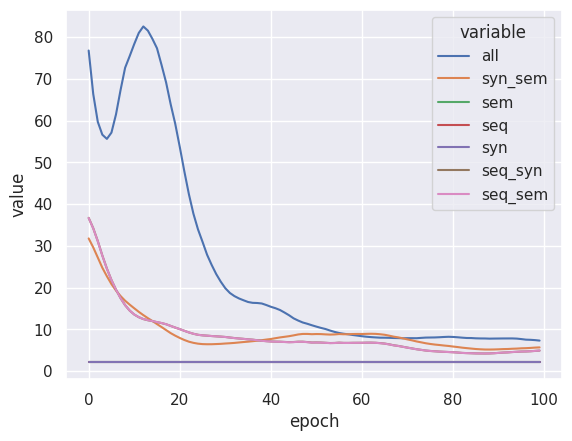

In [70]:
loss_res_df = pd.concat(
    [all_loss_res.test_loss, 
     syn_sem_loss_res.test_loss, 
     sem_loss_res.test_loss,
     seq_loss_res.test_loss,
     syn_loss_res.test_loss,
     seq_syn_loss_res.test_loss,
     seq_sem_loss_res.test_loss
     ],axis=1).reset_index()
loss_res_df.columns = ['epoch','all','syn_sem','sem','seq','syn','seq_syn','seq_sem']
loss_res_df_melted = loss_res_df.melt(id_vars='epoch')

sns.lineplot(data=loss_res_df_melted, x='epoch',y='value',hue='variable')

### Comparing test accuracy results

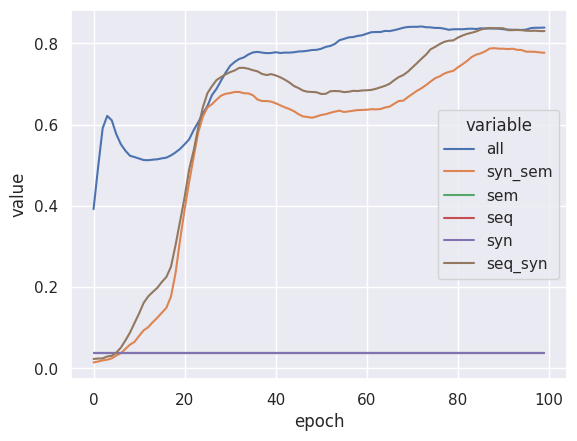

In [71]:
acc_res_df = pd.concat(
    [all_acc_res.test_acc, 
     syn_sem_acc_res.test_acc, 
     sem_acc_res.test_acc,
     seq_acc_res.test_acc,
     syn_acc_res.test_acc,
     seq_syn_acc_res.test_acc
     ],axis=1).reset_index()
acc_res_df.columns = ['epoch','all','syn_sem','sem','seq','syn','seq_syn']
acc_res_df_melted = acc_res_df.melt(id_vars='epoch')

sns.lineplot(data=acc_res_df_melted, x='epoch',y='value',hue='variable')

Looking across the test loss and accuracy metrics, using only 1 graph does not lead to any improvement in metrics across the epochs. 

This means that a minimally 2 graphs are needed to train a GCN model.

Let's take a look at the computational time for the various graphs combination. We will exclude using only 1 graph.

### Comparing epoch run times

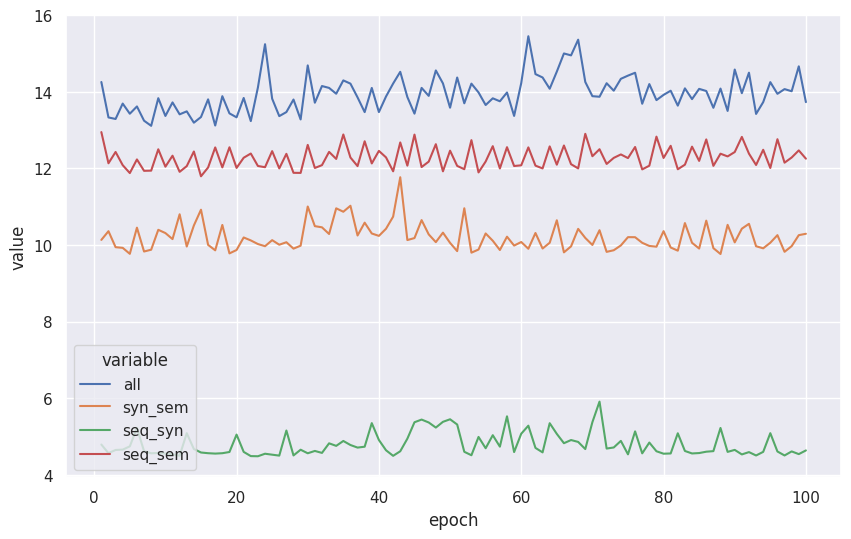

In [72]:
epoch_time_df = pd.concat([
    pd.DataFrame(all_epoch_time, columns=['epoch_time']).rename(columns={'epoch_time':'all'}),
    pd.DataFrame(syn_sem_epoch_time, columns=['epoch_time']).rename(columns={'epoch_time':'syn_sem'}),
    pd.DataFrame(seq_syn_epoch_time, columns=['epoch_time']).rename(columns={'epoch_time':'seq_syn'}),
    pd.DataFrame(seq_sem_epoch_time, columns=['epoch_time']).rename(columns={'epoch_time':'seq_sem'})
    ],
    axis=1
).reset_index().rename(columns={'index':'epoch'})
epoch_time_df['epoch'] = epoch_time_df['epoch'] + 1

epoch_time_df_melted = epoch_time_df.melt(id_vars='epoch')

# Adjust figure size
plt.figure(figsize=(10, 6))
sns.lineplot(data=epoch_time_df_melted, x='epoch',y='value',hue='variable')

In [52]:
epoch_time_df

,epoch,all,syn_sem,seq_syn,seq_sem
0,1,14.257477,10.135149,4.791734,12.949885
1,2,13.332460,10.362381,4.566189,12.135598
2,3,13.292447,9.944739,4.650071,12.431151
3,4,13.694450,9.927530,4.658377,12.086700
4,5,13.429436,9.771237,4.744694,11.879891
...,...,...,...,...,...
95,96,13.949212,10.259003,4.610597,12.763901
96,97,14.072217,9.823929,4.506745,12.151614
97,98,14.016346,9.972252,4.612454,12.286022
98,99,14.666731,10.258729,4.541862,12.471701


[Text(0, 0.5, 'Execution Time (Seconds)'), Text(0.5, 0, 'Graph Combinations')]

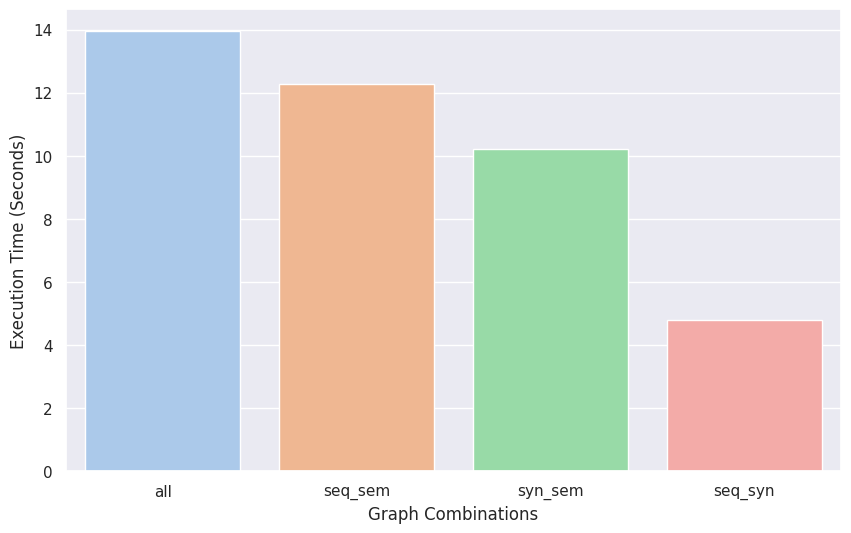

In [73]:
mean_epoch_time = pd.DataFrame(epoch_time_df.drop(['epoch'],axis=1).mean()).reset_index().sort_values(by=0,ascending=False)
mean_epoch_time.columns = ['graph_combi','mean_epoch_time']

# Adjust figure size
plt.figure(figsize=(10, 6))

# Create the barplot
epoch_time_barplot = sns.barplot(data=mean_epoch_time,x='graph_combi',y='mean_epoch_time', palette=palette)

# Set labels for x and y axes
epoch_time_barplot.set(xlabel='Graph Combinations',ylabel='Execution Time (Seconds)')
